In [26]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

# Transfusion Veri seti
transfusion = pd.read_csv('transfusion.data', engine = 'python')
transfusion

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
5,4,4,1000,4,0
6,2,7,1750,14,1
7,1,12,3000,35,0
8,2,9,2250,22,1
9,5,46,11500,98,1


In [27]:
#Bağımlı ve bağımsız değişkenleri ayrılması
X = transfusion.iloc[:,0:4].values
y = transfusion.iloc[:,4].values # Hedef değişkenimiz 4. indeksteydi.(whether he/she donated blood in March 2007)

print(y)
print(X)

[1 1 1 1 0 0 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 0 0 1 1 1 0 1 1
 1 1 1 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0
 1 1 1 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 1
 0 0 1 0 0 1 0 0 1 1 1 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0
 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1
 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [28]:
#Ver setinin Eğitim ve Test Seti olarak ayrılması--- TEST SIZE: %70
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=0)
print(X_test)

[[   4    3  750   28]
 [   2   11 2750   41]
 [   2    6 1500   15]
 ...
 [   9    3  750   14]
 [  11    4 1000   16]
 [   2    1  250    2]]


In [29]:
#MULTINOMIAL NAIVE BAYES
from sklearn.naive_bayes import MultinomialNB #sklearn kütüphanesinden MultinomialNB sınıfını import ettik
mnb = MultinomialNB()# MultinomialNB sınıfından bir nesne oluşturduk
mnb.fit(X_train, y_train.ravel())#Modeli eğitiyoruz #♦modelin kullanacağı parametreler
mnb_predict_result = mnb.predict(X_test)# Test veri kümemizi verdik ve transfusion sınıf türünü tahmin etmesini sağladık, test etmesini
mnbcm = confusion_matrix(y_test,mnb_predict_result)#Karmaşıklık matrisi --> Test verisi ile tahmin değerlerini karşılaştırmamızı ve modelin performansını ölçmemizi sağlar.
# Başarı Oranı
mnb_accuracy = accuracy_score(y_test, mnb_predict_result)
# Sonuç : (MultinomialNB sınıfı için)
print('Multinomial Naive Bayes Accuracy Değeri:')
print(mnb_accuracy)
print('')
print('F1 Score:')
print(classification_report(y_test,mnb_predict_result))
print('')
print('Confusion Matrix:')
print(mnbcm)

Multinomial Naive Bayes Accuracy Değeri:
0.7347328244274809

F1 Score:
              precision    recall  f1-score   support

           0       0.86      0.78      0.82       398
           1       0.46      0.60      0.52       126

    accuracy                           0.73       524
   macro avg       0.66      0.69      0.67       524
weighted avg       0.76      0.73      0.75       524


Confusion Matrix:
[[309  89]
 [ 50  76]]


In [30]:
#BERNOULLI NAIVE BAYES
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(X_train, y_train.ravel())
bnb_predict_result = bnb.predict(X_test)
bnbcm = confusion_matrix(y_test,bnb_predict_result)
# Başarı Oranı
bnb_accuracy = accuracy_score(y_test, bnb_predict_result)
# Sonuç : (MultinomialNB sınıfı için)
print('Bernoulli Naive Bayes Accuracy Değeri:')
print(bnb_accuracy)
print('')
print('F1 Score:')
print(classification_report(y_test,bnb_predict_result))
print('')
print('Confusion Matrix:')
print(bnbcm)

Bernoulli Naive Bayes Accuracy Değeri:
0.7595419847328244

F1 Score:
              precision    recall  f1-score   support

           0       0.76      1.00      0.86       398
           1       0.00      0.00      0.00       126

    accuracy                           0.76       524
   macro avg       0.38      0.50      0.43       524
weighted avg       0.58      0.76      0.66       524


Confusion Matrix:
[[398   0]
 [126   0]]


C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [31]:
#GAUSSIAN NAIVE BAYES
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train.ravel())
gnb_predict_result = gnb.predict(X_test)
gnbcm = confusion_matrix(y_test,gnb_predict_result)
# Başarı Oranı
gnb_accuracy = accuracy_score(y_test, gnb_predict_result)
# Sonuç : (MultinomialNB sınıfı için)
print('Gaussian Naive Bayes Accuracy Değeri:')
print(gnb_accuracy)
print('')
print('F1 Score:')
print(classification_report(y_test,gnb_predict_result))
print('')
print('Confusion Matrix:')
print(gnbcm)

Gaussian Naive Bayes Accuracy Değeri:
0.7729007633587787

F1 Score:
              precision    recall  f1-score   support

           0       0.79      0.96      0.86       398
           1       0.59      0.19      0.29       126

    accuracy                           0.77       524
   macro avg       0.69      0.57      0.58       524
weighted avg       0.74      0.77      0.73       524


Confusion Matrix:
[[381  17]
 [102  24]]


In [20]:
#Multinomial, Bernoulli, Gaussian Karşılaştırma Tablosu
models = pd.DataFrame({
    'Model': ['Mutinominal', 'Bernoulli', 'Gaussian'],
    'Score': [mnb_accuracy, bnb_accuracy, gnb_accuracy]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Gaussian,0.772901
1,Bernoulli,0.759542
0,Mutinominal,0.734733


In [21]:
#CNN
from __future__ import print_function
import pandas as pd 
import keras
from keras import Model, optimizers, Input
from keras.layers import Dense, Dropout, SpatialDropout1D, Convolution1D, GlobalMaxPool1D, Embedding
import matplotlib.pyplot as plt

def create_cnn():
    input_layer = Input((4,))

    embedding_layer = Embedding(50000, 100, trainable=False)(
        input_layer)

    conv_layer = Convolution1D(100, 3, activation="relu")(embedding_layer)
    conv_layer = SpatialDropout1D(0.25)(conv_layer)

    pooling_layer = GlobalMaxPool1D()(conv_layer)

    output_layer1 = Dense(128, activation="relu")(pooling_layer)
    output_layer1 = Dropout(0.25)(output_layer1)
    output_layer2 = Dense(1, activation="sigmoid")(output_layer1)

    model = Model(inputs=input_layer, outputs=output_layer2)
    model.compile(optimizer=optimizers.Adam(), loss='binary_crossentropy')

    return model

In [22]:
model = create_cnn()
model.compile(loss=keras.losses.binary_crossentropy, 
              optimizer='adam',
             metrics=['accuracy'])

In [23]:
training_model=model.fit(X_train, y_train,
          batch_size= 16, 
          epochs=10,
          verbose=1,
          validation_data=(X_test, y_test))
score = model.evaluate(X_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 224 samples, validate on 524 samples
Epoch 1/10
224/224 [==============================] - 1s 3ms/step - loss: 0.6511 - accuracy: 0.7455 - val_loss: 0.6043 - val_accuracy: 0.7595
Epoch 2/10
224/224 [==============================] - 0s 467us/step - loss: 0.5697 - accuracy: 0.7679 - val_loss: 0.5418 - val_accuracy: 0.7595
Epoch 3/10
224/224 [==============================] - 0s 454us/step - loss: 0.5200 - accuracy: 0.7679 - val_loss: 0.5394 - val_accuracy: 0.7595
Epoch 4/10
224/224 [==============================] - 0s 499us/step - loss: 0.5004 - accuracy: 0.7679 - val_loss: 0.5376 - val_accuracy: 0.7595
Epoch 5/10
224/224 [==============================] - 0s 481us/step - loss: 0.4934 - accuracy: 0.7679 - val_loss: 0.5344 - val_accuracy: 0.7595
Epoch 6/10
224/224 [==============================] - 0s 499us/step - loss: 0.4744 - accuracy: 0.7679 - val_loss: 0.5381 - val_accuracy: 0.7595
Epoch 7/10
224/224 [==============================] - 0s 485us/step - loss: 0.4529 - accurac

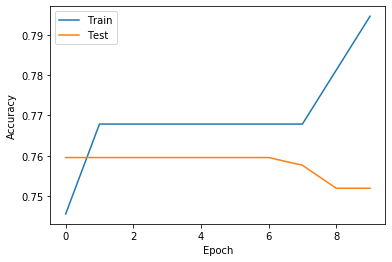

In [24]:
plt.plot(training_model.history['accuracy'])
plt.plot(training_model.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Test'], loc='upper left')
plt.show()

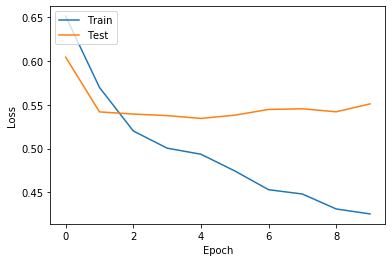

In [25]:
plt.plot(training_model.history['loss'])
plt.plot(training_model.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Test'], loc='upper left')
plt.show()